# Discovering Frequent Patterns in Big Data Using FAE Algorithm

In this tutorial, we will discuss two approaches to find frequent patterns in big data using FAE algorithm.

1. [__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single specified counte
2. [__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple specified counte.

***

## <a id='basicApproach'>Basic approach: Executing FAE on a single dataset at a particular specified counte value</a>

#### Step 0: install pami repository

In [1]:
!pip install -U pami

#### Step 1: Import the FAE algorithm

In [1]:
from PAMI.frequentPattern.topk import FAE  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'

kCount=100  #Users can also specify this constraint between 0 to 1.

seperator='\t'       

#### Step 3: Execute the FAE algorithm

In [3]:
obj = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

 TopK frequent patterns were successfully generated using FAE algorithm.


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [5]:
obj.save(outFile='frequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [6]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [7]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 100


##### Step 5.2: Runtime consumed by the mining algorithm

In [8]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 3.6895008087158203


In [9]:
##### Step 5.3: Total Memory consumed by the mining algorithm

In [10]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 197804032
Memory (USS): 178700288


# Advanced Tutorial on Implementing FAE Algorithm

***

#### In this tutorial, we explain how the FAE algorithm  can be implemented by varying the specified counte values

#### Step 1: Import the FAE algorithm and pandas data frame

In [11]:
from PAMI.frequentPattern.topk import FAE  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [12]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'
seperator='\t'
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FAE algorithm

#### Step 3: Execute the FAE algorithm using a for loop

In [13]:
algorithm = 'FAE'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.FAE('https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv', k=minSupCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.


In [14]:
print(result)

  algorithm  minSup  patterns    runtime     memory
0       FAE     100       100   7.173833   39354368
1       FAE     150       150   5.328780  211058688
2       FAE     200       200   7.765071  106856448
3       FAE     250       250   9.853272  210272256
4       FAE     300       300  13.779422   39337984


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [15]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

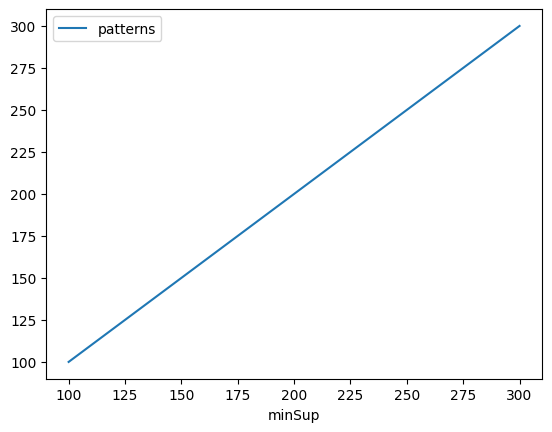

Graph for No Of Patterns is successfully generated!


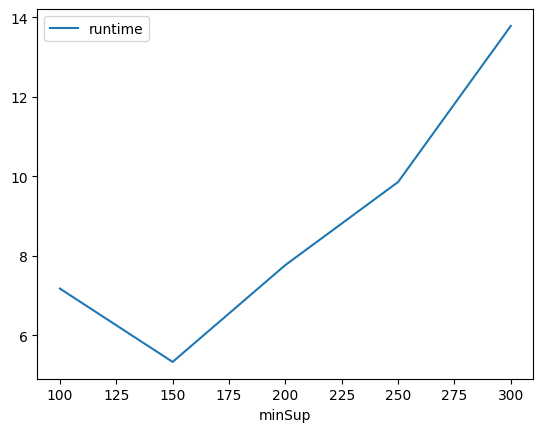

Graph for Runtime taken is successfully generated!


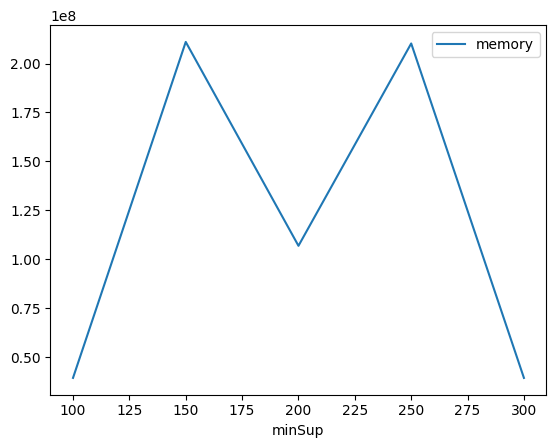

Graph for memory consumption is successfully generated!


In [16]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [17]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
